In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Clustering/C03_pokemon.csv')
data.head()

,pokemon_name,main_type,secondary_type,category,height,weight,pokemon_family
0,Bulbasaur,Grass,Poison,Seed,0.7 m,6.9 kg,Bulbasaur family
1,Ivysaur,Grass,Poison,Seed,1 m,13 kg,Bulbasaur family
2,Venusaur,Grass,Poison,Seed,2 m,100 kg,Bulbasaur family
3,Charizard,Fire,Flying,Flame,1.7 m,90.5 kg,Charmander family
4,Butterfree,Bug,Flying,Butterfly,1.1 m,32 kg,Caterpie family


In [3]:
data = data.drop(['pokemon_name', 'main_type', 'secondary_type', 'category', 'pokemon_family'], axis=1)
data.head()

,height,weight
0,0.7 m,6.9 kg
1,1 m,13 kg
2,2 m,100 kg
3,1.7 m,90.5 kg
4,1.1 m,32 kg


In [4]:
# CARA 1 HARUS DIHILANGKAN KG & M NYA
# CARA 2 DI LABEL ENCODING

In [5]:
# CARA 2
from sklearn.preprocessing import LabelEncoder
for col in ['height', 'weight']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [6]:
data.head()

,height,weight
0,9,210
1,16,30
2,30,15
3,26,257
4,19,134


Text(0.5, 0, 'height')

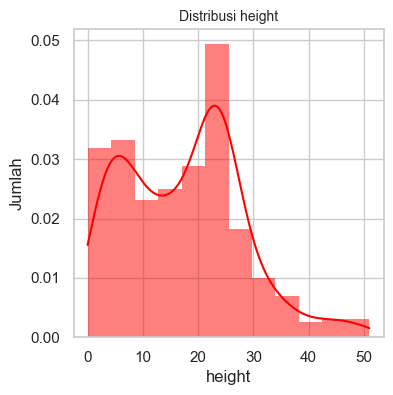

In [7]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['height'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi height', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('height')

Text(0.5, 0, 'weight')

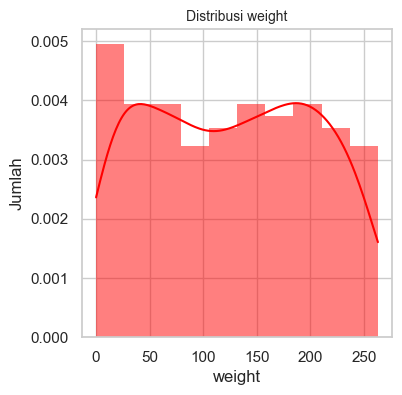

In [8]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['weight'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi weight', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('weight')

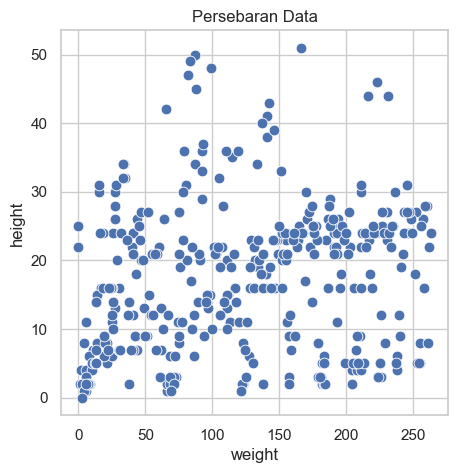

In [9]:
# Persebaran Data
plt.figure(figsize=(5,5))
sns.scatterplot(x='weight', y='height', data = data, s = 60)
plt.title('Persebaran Data')
plt.show()

In [10]:
# hitung within cluster sum of squared error (WCSS) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(data)
    wcss.append(kmModel.inertia_)

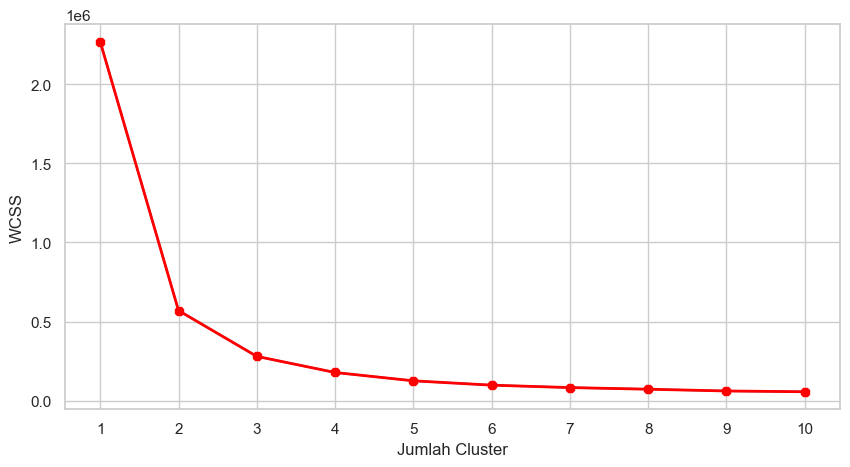

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [12]:
# model dengan 2 cluster
kmModelFix = KMeans(n_clusters=2, n_init=10)
kmModelFix.fit(data)

# memprediksi label
hasil_prediksi = kmModelFix.predict(data)
print(hasil_prediksi)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 1 1 1 1]


In [13]:
data['label'] = hasil_prediksi
data.head()

,height,weight,label
0,9,210,1
1,16,30,0
2,30,15,0
3,26,257,1
4,19,134,1


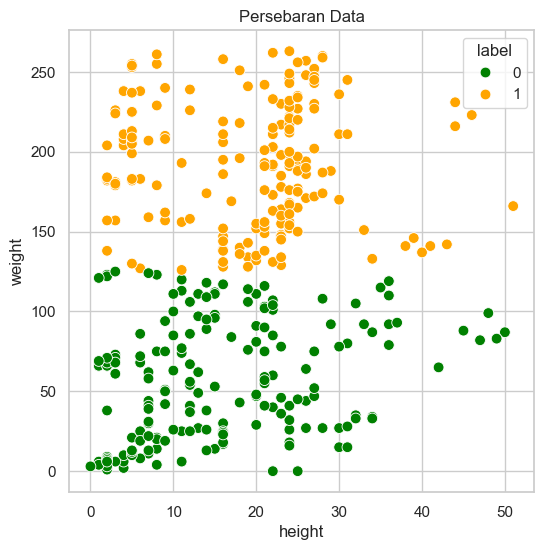

In [14]:
# Persebaran Data beserta labelnya
plt.figure(figsize=(6,6))
sns.scatterplot(x='height', y='weight', hue='label',
                palette=['green', 'orange'], legend='full',
                data = data, s = 60)
plt.title('Persebaran Data')
plt.show()